# Мониторинг успеваемости студентов по результатам онлайн тестирования

### Задачи:
 - разделение студентов на группы (сегментация студентов с использованием адаптированных RFM кластеров), с выделением тех, кто ***сдали зачет***, кому ***требуется пересдача*** или кому ***требуется дополнительно сделать задания*** или ***сдать долги***.
 - составление рейтинга студентов для выявления самых лучших;
 - выявление самой сложной темы в рамках предмета ***Экология*** для проработки на занятиях.
 
**Зачет сдан, если выполнены следующие условия:**
 - Сдан тест до 20 мая 2023 года.
 - Оценка за тест 4 или 5 (набрано 60+ баллов).
 - Сдан доклад.
 - Процент посещения более 50%.
 
`ecology_all_data.csv` - Данные по результатам прохождения тестирования, полученные с сайта конструктора онлайн-тестов [**Online Test Pad**](https://app.onlinetestpad.com/).

`ecology_lectures.csv`  - Данные посещения лекций студентами, а также наличия/отсутствия у них реферата и дополнительно решенной задачи. Создавались в **Excel** и вносились преподавателем по мере прохождения студентов курса по экологии. Здесь присутствуют все студенты, которые проходят данный курс.

Колонки имеют неправильные названия, поэтому здесь они не будут представлены, ниже в работе они будут переименованы и обозначены.

Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime
import squarify
from datetime import datetime

Проверим, считываются ли данные.

In [2]:
ecology_test = pd.read_csv('ecology_all_data.csv', sep = ';')
ecology_test.head(1)

,#,№,Пользователь,IP,Дата завершения,Потрачено времени,ФИО,Группа,e-mail,Количество правильных ответов,...,Unnamed: 173,Вопрос № 55,Unnamed: 175,Unnamed: 176,Вопрос № 56,Unnamed: 178,Unnamed: 179,Вопрос № 57,Unnamed: 181,Unnamed: 182
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ecology_test.columns

Index(['#', '№', 'Пользователь', 'IP', 'Дата завершения', 'Потрачено времени',
       'ФИО', 'Группа', 'e-mail', 'Количество правильных ответов',
       ...
       'Unnamed: 173', 'Вопрос № 55', 'Unnamed: 175', 'Unnamed: 176',
       'Вопрос № 56', 'Unnamed: 178', 'Unnamed: 179', 'Вопрос № 57',
       'Unnamed: 181', 'Unnamed: 182'],
      dtype='object', length=183)

In [4]:
ecology_test.shape

(42, 183)

### Предварительная подготовка данных

Мы видим, что данные корректно считались, однако также видим, что у нас есть лишние, ненужные нам колонки и строки, избавимся от них. Кроме того, также видим, что многие колонки имеют нерелевантные названия, которые мы изменим далее.

In [5]:
ecology_test.columns = ecology_test.columns.str.replace('Unnamed: ', '')

In [6]:
ecology_test.columns = ecology_test.columns.str.replace('Вопрос № ','question_')
ecology_test.drop(index=ecology_test.index[0], axis= 0, inplace= True )

Ранее мы видели, что у нас 183 колонки, и нам важно посмотреть все их названия, для этого поместим их в список.

In [7]:
columns_list = list(ecology_test)
columns_list

['#',
 '№',
 'Пользователь',
 'IP',
 'Дата завершения',
 'Потрачено времени',
 'ФИО',
 'Группа',
 'e-mail',
 'Количество правильных ответов',
 'Процент правильных ответов (%)',
 'Ваша оценка:',
 'question_1',
 '13',
 '14',
 'question_2',
 '16',
 '17',
 'question_3',
 '19',
 '20',
 'question_4',
 '22',
 '23',
 'question_5',
 '25',
 '26',
 'question_6',
 '28',
 '29',
 'question_7',
 '31',
 '32',
 'question_8',
 '34',
 '35',
 'question_9',
 '37',
 '38',
 'question_10',
 '40',
 '41',
 'question_11',
 '43',
 '44',
 'question_12',
 '46',
 '47',
 'question_13',
 '49',
 '50',
 'question_14',
 '52',
 '53',
 'question_15',
 '55',
 '56',
 'question_16',
 '58',
 '59',
 'question_17',
 '61',
 '62',
 'question_18',
 '64',
 '65',
 'question_19',
 '67',
 '68',
 'question_20',
 '70',
 '71',
 'question_21',
 '73',
 '74',
 'question_22',
 '76',
 '77',
 'question_23',
 '79',
 '80',
 'question_24',
 '82',
 '83',
 'question_25',
 '85',
 '86',
 'question_26',
 '88',
 '89',
 'question_27',
 '91',
 '92',
 'que

Создадим список названий всех колонок, которые соответствую только номерам вопросов.

In [8]:
question_list = []
for i in (columns_list[12::3]):
    question_list.append(i)

In [9]:
question_list

['question_1',
 'question_2',
 'question_3',
 'question_4',
 'question_5',
 'question_6',
 'question_7',
 'question_8',
 'question_9',
 'question_10',
 'question_11',
 'question_12',
 'question_13',
 'question_14',
 'question_15',
 'question_16',
 'question_17',
 'question_18',
 'question_19',
 'question_20',
 'question_21',
 'question_22',
 'question_23',
 'question_24',
 'question_25',
 'question_26',
 'question_27',
 'question_28',
 'question_29',
 'question_30',
 'question_31',
 'question_32',
 'question_33',
 'question_34',
 'question_35',
 'question_36',
 'question_37',
 'question_38',
 'question_39',
 'question_40',
 'question_41',
 'question_42',
 'question_43',
 'question_44',
 'question_45',
 'question_46',
 'question_47',
 'question_48',
 'question_49',
 'question_50',
 'question_51',
 'question_52',
 'question_53',
 'question_54',
 'question_55',
 'question_56',
 'question_57']

Аналогично создадим список, состоящий их названия всех колонок, которые соответствую только количеству времени `sec_list`, потраченного на решение вопросов теста, а также количеству правильно набранных баллов за каждое задание `question_true_list`.

In [10]:
sec_list = []
for i in question_list:
    sec_list.append(i.replace('question','sec'))

In [11]:
question_true_list = []
for i in question_list:
    question_true_list.append(i.replace('question','question_true'))

Создадим датафрейм `ecology_test_sec`, в котором будет содержаться информация по времени прохождения каждого теста, названия колонок возьмем из ранее созданного списка `sec_list`.

In [12]:
ecology_test_sec = ecology_test.iloc[:,13::3]
ecology_test_sec.columns = sec_list
ecology_test_sec.head()

,sec_1,sec_2,sec_3,sec_4,sec_5,sec_6,sec_7,sec_8,sec_9,sec_10,...,sec_48,sec_49,sec_50,sec_51,sec_52,sec_53,sec_54,sec_55,sec_56,sec_57
1,80 сек.,181 сек.,38 сек.,96 сек.,22 сек.,125 сек.,21 сек.,30 сек.,44 сек.,46 сек.,...,58 сек.,111 сек.,636 сек.,36 сек.,98 сек.,0 сек.,66 сек.,128 сек.,114 сек.,214 сек.
2,26 сек.,26 сек.,54 сек.,17 сек.,19 сек.,53 сек.,33 сек.,20 сек.,35 сек.,61 сек.,...,59 сек.,104 сек.,146 сек.,21 сек.,21 сек.,92 сек.,35 сек.,144 сек.,50 сек.,100 сек.
3,28 сек.,5 сек.,7 сек.,120 сек.,39 сек.,86 сек.,19 сек.,28 сек.,73 сек.,144 сек.,...,36 сек.,33 сек.,207 сек.,10 сек.,16 сек.,46 сек.,34 сек.,105 сек.,75 сек.,75 сек.
4,88 сек.,71 сек.,219 сек.,46 сек.,27 сек.,159 сек.,51 сек.,49 сек.,57 сек.,107 сек.,...,330 сек.,6 сек.,86 сек.,68 сек.,40 сек.,194 сек.,42 сек.,77 сек.,37 сек.,4 сек.
5,2 сек.,2 сек.,2 сек.,2 сек.,3 сек.,3 сек.,2 сек.,2 сек.,2 сек.,5 сек.,...,7 сек.,3 сек.,8 сек.,2 сек.,2 сек.,3 сек.,3 сек.,8 сек.,41 сек.,10 сек.


Аналогично создадим датафрейм `ecology_test_quest_true`, в котором будет содержаться информация по количеству набранных баллов для каждого вопроса теста, названия колонок возьмем из ранее созданного списка `question_true_list`.

In [13]:
ecology_test_quest_true = ecology_test.iloc[:,14::3]
ecology_test_quest_true.columns = question_true_list
ecology_test_quest_true.head()

,question_true_1,question_true_2,question_true_3,question_true_4,question_true_5,question_true_6,question_true_7,question_true_8,question_true_9,question_true_10,...,question_true_48,question_true_49,question_true_50,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57
1,1 из 1,1 из 1,1 из 1,1 из 1,1 из 1,0 из 1,1 из 1,"0,5 из 0,5",1 из 1,0 из 1,...,1 из 1,1 из 1,0 из 1,1 из 1,0 из 1,0 из 1,1 из 1,0 из 4,0 из 1,1 из 1
2,1 из 1,1 из 1,1 из 1,1 из 1,1 из 1,1 из 1,1 из 1,"0,5 из 0,5",1 из 1,1 из 1,...,1 из 1,1 из 1,0 из 1,1 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,1 из 1
3,0 из 1,1 из 1,1 из 1,1 из 1,0 из 1,0 из 1,1 из 1,"0,5 из 0,5",1 из 1,1 из 1,...,1 из 1,1 из 1,1 из 1,1 из 1,1 из 1,1 из 1,0 из 1,4 из 4,0 из 1,1 из 1
4,0 из 1,1 из 1,0 из 1,1 из 1,1 из 1,1 из 1,1 из 1,"0,5 из 0,5",1 из 1,0 из 1,...,0 из 1,0 из 1,0 из 1,1 из 1,1 из 1,1 из 1,1 из 1,4 из 4,0 из 1,0 из 1
5,0 из 1,1 из 1,0 из 1,0 из 1,0 из 1,0 из 1,0 из 1,"0 из 0,5",0 из 1,0 из 1,...,0 из 1,1 из 1,0 из 1,0 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,0 из 1


Удалим в исходной таблице `ecology_test` старые колонки с неверными названиями и объединим ее с новыми полученными датафреймами `ecology_test_sec` и `ecology_test_quest_true`. Перезапишеи все в таблицу `ecology_test`, изменим названия колонок на более удобные, удалим лишние колонки.

- `user_id` - id студента, сдававшего онлайн тест
- `date` - дата сдачи теста
- `time` - время, затраченное на сдачу теста
- `group` - группа
- `true_unswer` - количество набранных баллов на каждый из вопросов
- `true_percent` - процент верных ответов за тест
- `score` - оценка

In [14]:
ecology_test = ecology_test.drop(columns=ecology_test.iloc[:,13::3])\
                        .drop(columns=ecology_test.iloc[:,14::3])

In [15]:
ecology_test = pd.concat([ecology_test, ecology_test_sec, ecology_test_quest_true], axis=1)

In [16]:
ecology_test = ecology_test.rename(columns={'№':'user_id',
                     'Дата завершения':'date',
                     'Потрачено времени':'time',
                     'ФИО':'name','Группа':'group',
                     'Количество правильных ответов':'true_unswer',
                    'Процент правильных ответов (%)':'true_percent',
                    'Ваша оценка:':'score'})

In [17]:
ecology_test = ecology_test.drop(columns=['#','Пользователь','e-mail'])

In [18]:
ecology_test.shape

(41, 180)

В колонке `name` - удалим пробелы.

In [19]:
ecology_test['name'] = ecology_test.name.replace(r'\s\B', '', regex=True)

Далее, мы хотим посмотреть, какие символы участвуют в именах пользователей, это необходимо для того, чтобы понять, есть ли какие-то ошибки в именах, или может кто-то написал латиницей, добавил небуквенный символ и т.д. Это нужно для того, чтобы выявить опечатки для дальнейшего корректного объединения таблиц.

In [20]:
set( ''.join(ecology_test['name'].unique()))

{' ',
 'А',
 'Б',
 'В',
 'Г',
 'Д',
 'Е',
 'Ж',
 'З',
 'И',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'У',
 'Х',
 'Ш',
 'Щ',
 'Ю',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'ы',
 'ь',
 'ю',
 'я',
 'ё'}

Видим, что все буквы кириллицей, символов нет. Далее мы разделим имена пользователей на 3 - фамилию, имя и отчество, для этого создадим дополнительные колонки.

In [21]:
ecology_test['last_name'] = ecology_test['name'].str.split(' ', expand=True)[0].str.strip()
ecology_test['first_name'] = ecology_test['name'].str.split(' ', expand=True)[1].str.strip()
ecology_test['middle_name'] = ecology_test['name'].str.split(' ', expand=True)[2].str.strip()

In [22]:
ecology_test.last_name.isna().sum()

0

In [23]:
ecology_test.first_name.isna().sum()

1

In [24]:
ecology_test.middle_name.isna().sum()

1

Мы обнаружили, что в имени и отчестве есть пропущенные значения, отфильтруем их.

In [25]:
ecology_test[ecology_test.middle_name.isna() == True]

,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
5,198157853.0,85.26.165.57,26.05.2023 15:50,0:04:58,Лекремьоара,2061.0,12,"18,05",2.0,Национальном,...,0 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,0 из 1,Лекремьоара,None,None


Пропущенное значение в имени и отчестве соответствует одному и тому же студенту.

Далее отфильтруем студентов, у кого есть проблемы в записи фамилии, имени и отчестве (кто перепутал их местами). Сделать, например по фамилии это достаточно сложно, но например, по отчеству легче. В основном все отчества мужского пола заканчиваются на "ич", а женского пола - на "на". Отфильтруем отчества, которые не заканчиваются указанным образом.

In [26]:
ecology_test[ecology_test['middle_name'].str.endswith('ич')==False][ecology_test['middle_name'].str.endswith('на')==False]

C:\Users\alexa\AppData\Local\Temp/ipykernel_10000/3139823956.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecology_test[ecology_test['middle_name'].str.endswith('ич')==False][ecology_test['middle_name'].str.endswith('на')==False]


,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
10,197664284.0,188.232.4.27,23.05.2023 23:43,1:24:09,Елизавета Алексеевна Зуева,2061.0,"53,5","80,45",5.0,Глобальном,...,1 из 1,1 из 1,1 из 1,1 из 1,4 из 4,1 из 1,1 из 1,Елизавета,Алексеевна,Зуева
15,197146316.0,213.80.204.196,21.05.2023 1:04,2:00:00,Карпова Елизавета Александровна,2081.0,104,"79,69",4.0,Глобальном,...,1 из 1,1 из 1,0 из 1,1 из 1,4 из 4,0 из 1,1 из 1,,Карпова,Елизавета
37,194507010.0,85.249.26.184,08.05.2023 22:45,1:40:56,Сергей Петрович Захаров,2032.0,"36,5","54,89",3.0,Глобальном,...,1 из 1,1 из 1,1 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Сергей,Петрович,Захаров


Видим, что у нас есть такие студенты, которые перепутали местами имя, фамилию и отчество, или у кого они не корректно записались. Создадим копию датафрейма и поменяем там в этих ячейках информацию на верную.

In [27]:
ecology_test_copy = ecology_test.copy()
ecology_test_copy.head(2)

,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
1,198465066.0,88.147.153.115,30.05.2023 1:20,1:51:42,Пахомов Евгений Валентинович,2111.0,"39,5","59,4",3.0,Глобальном,...,1 из 1,0 из 1,0 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Пахомов,Евгений,Валентинович
2,198299125.0,93.81.30.230,28.05.2023 16:36,1:19:47,Уварова Дарья Романовна,2111.0,"45,5","68,42",4.0,Глобальном,...,1 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Уварова,Дарья,Романовна


In [28]:
ecology_test_copy.loc[15,'last_name'] = 'Карпова'
ecology_test_copy.loc[15,'first_name']='Елизавета'
ecology_test_copy.loc[10,'last_name'] = 'Зуева'
ecology_test_copy.loc[10,'first_name'] = 'Елизавета'
ecology_test_copy.loc[37,'last_name'] = 'Захаров'
ecology_test_copy.loc[37,'first_name'] = 'Сергей'

Объединим колонки `last_name` (фамилия) и `first_name` (имя) в одну, по ней будем объединять позже данные.

In [29]:
ecology_test_copy['name'] = ecology_test_copy['last_name'] + ' ' + ecology_test_copy['first_name']
ecology_test_copy.head()

,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
1,198465066.0,88.147.153.115,30.05.2023 1:20,1:51:42,Пахомов Евгений,2111.0,"39,5","59,4",3.0,Глобальном,...,1 из 1,0 из 1,0 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Пахомов,Евгений,Валентинович
2,198299125.0,93.81.30.230,28.05.2023 16:36,1:19:47,Уварова Дарья,2111.0,"45,5","68,42",4.0,Глобальном,...,1 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Уварова,Дарья,Романовна
3,198176137.0,87.238.233.67,26.05.2023 19:06,1:33:20,Щекотов Всеволод,2061.0,"41,5","62,41",4.0,Межгосударственном,...,1 из 1,1 из 1,1 из 1,0 из 1,4 из 4,0 из 1,1 из 1,Щекотов,Всеволод,Александрович
4,198175086.0,37.144.188.105,26.05.2023 18:52,1:57:02,Веремейчик Павел,2051.0,"42,5","63,91",4.0,Межгосударственном,...,1 из 1,1 из 1,1 из 1,1 из 1,4 из 4,0 из 1,0 из 1,Веремейчик,Павел,Сергеевич
5,198157853.0,85.26.165.57,26.05.2023 15:50,0:04:58,NaN,2061.0,12,"18,05",2.0,Национальном,...,0 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,0 из 1,Лекремьоара,None,None


In [30]:
ecology_test_copy.name.nunique()

39

In [31]:
ecology_test_copy.shape

(41, 183)

In [32]:
ecology_test_copy[ecology_test_copy.name.isna() == True]

,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
5,198157853.0,85.26.165.57,26.05.2023 15:50,0:04:58,NaN,2061.0,12,"18,05",2.0,Национальном,...,0 из 1,1 из 1,0 из 1,1 из 1,0 из 4,0 из 1,0 из 1,Лекремьоара,None,None


In [33]:
ecology_test_copy[ecology_test_copy.name.duplicated() == True]

,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
37,194507010.0,85.249.26.184,08.05.2023 22:45,1:40:56,Захаров Сергей,2032.0,"36,5","54,89",3.0,Глобальном,...,1 из 1,1 из 1,1 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Захаров,Сергей,Захаров


In [34]:
ecology_test_copy.query('name == "Захаров Сергей"')

,user_id,IP,date,time,name,group,true_unswer,true_percent,score,question_1,...,question_true_51,question_true_52,question_true_53,question_true_54,question_true_55,question_true_56,question_true_57,last_name,first_name,middle_name
33,194514144.0,85.26.233.89,09.05.2023 0:35,1:45:57,Захаров Сергей,2032.0,97,"74,33",4.0,Глобальном,...,1 из 1,1 из 1,1 из 1,1 из 1,4 из 4,0 из 1,1 из 1,Захаров,Сергей,Петрович
37,194507010.0,85.249.26.184,08.05.2023 22:45,1:40:56,Захаров Сергей,2032.0,"36,5","54,89",3.0,Глобальном,...,1 из 1,1 из 1,1 из 1,1 из 1,0 из 4,0 из 1,1 из 1,Захаров,Сергей,Захаров


Мы проверили количество строк в таблице - 41, и количество уникальных имен - 39, а должно быть также 41. Аномалия связана с тем, что у нас вместо одного имени есть пустое значение, а также есть дубликат, студент Захаров Сергей проходил тест дважды.

Далее мы видим, что в таблице с временем прохождения вопросов теста в ячейках присутствуют не только количество секунд, но и слово **сек.**, от которого нужно избавиться.

In [35]:
ecology_test_sec = ecology_test_sec.replace(to_replace ='сек.', value = '', regex = True).astype('float')
ecology_test_sec['name'] = ecology_test.name
ecology_test_sec.head()

,sec_1,sec_2,sec_3,sec_4,sec_5,sec_6,sec_7,sec_8,sec_9,sec_10,...,sec_49,sec_50,sec_51,sec_52,sec_53,sec_54,sec_55,sec_56,sec_57,name
1,80.0,181.0,38.0,96.0,22.0,125.0,21.0,30.0,44.0,46.0,...,111.0,636.0,36.0,98.0,0.0,66.0,128.0,114.0,214.0,Пахомов Евгений Валентинович
2,26.0,26.0,54.0,17.0,19.0,53.0,33.0,20.0,35.0,61.0,...,104.0,146.0,21.0,21.0,92.0,35.0,144.0,50.0,100.0,Уварова Дарья Романовна
3,28.0,5.0,7.0,120.0,39.0,86.0,19.0,28.0,73.0,144.0,...,33.0,207.0,10.0,16.0,46.0,34.0,105.0,75.0,75.0,Щекотов Всеволод Александрович
4,88.0,71.0,219.0,46.0,27.0,159.0,51.0,49.0,57.0,107.0,...,6.0,86.0,68.0,40.0,194.0,42.0,77.0,37.0,4.0,Веремейчик Павел Сергеевич
5,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,5.0,...,3.0,8.0,2.0,2.0,3.0,3.0,8.0,41.0,10.0,Лекремьоара


Для удобства дальнейшей работы - создадим новый датафрейм, выбрав следующие колонки:
- `name` - имя студента,
- `group` - группа,
- `true_percent` - процент правильно решенных задач,
- `score` - оценка,
- `date` - дата сдачи,
- `time` - продолжительность прохождения теста.

In [36]:
ecology_test_df = ecology_test_copy[['name','group','true_percent','score','date','time']]
ecology_test_df.head()

,name,group,true_percent,score,date,time
1,Пахомов Евгений,2111.0,"59,4",3.0,30.05.2023 1:20,1:51:42
2,Уварова Дарья,2111.0,"68,42",4.0,28.05.2023 16:36,1:19:47
3,Щекотов Всеволод,2061.0,"62,41",4.0,26.05.2023 19:06,1:33:20
4,Веремейчик Павел,2051.0,"63,91",4.0,26.05.2023 18:52,1:57:02
5,NaN,2061.0,"18,05",2.0,26.05.2023 15:50,0:04:58


Далее проверим, как считывается файл `ecology_lectures.csv`

In [37]:
ecology_scores = pd.read_csv('C:/Users/alexa/jupyter-a-arzhanuhina-35/pet_project/ecology_lectures.csv', sep = ';')
ecology_scores.head()

,№ п/п,ФИО,Группа,03.02.2023,10.02.2023,03.03.2023,10.03.2023,17.03.2023,31.03.2023,Доп. Балл,∑ Посещений,% Посещения,Реферат,Задача (бонус),Тест,Зачет
0,1,Гресь Артём Александрович,2082,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,117,1.0,NaN,NaN,NaN
1,6,Сыров Михаил Владимирович,2082,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,117,1.0,NaN,NaN,NaN
2,17,Городнева Анастасия Сергеевна,2111,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,117,1.0,NaN,NaN,NaN
3,3,Ковалев Александр Дмитриевич,2082,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6,100,1.0,NaN,NaN,NaN
4,5,Крючков Егор Сергеевич,2082,1.0,1.0,1.0,1.0,1.0,1.0,NaN,6,100,1.0,NaN,NaN,NaN


Аналогично разобьем колонку `ФИО` на три - фамилия, имя и отчество, и добавим новую колонку с именем и фамилией, чтобы далее по ней производить объединение таблиц.

In [38]:
ecology_scores['last_name'] = ecology_scores['ФИО'].str.split(' ', expand=True)[0].str.strip()
ecology_scores['first_name'] = ecology_scores['ФИО'].str.split(' ', expand=True)[1].str.strip()
ecology_scores['name'] = ecology_scores['last_name'] + ' ' + ecology_scores['first_name']

Удалим лишие колонки, переименуем оставшиеся.

In [39]:
ecology_scores = ecology_scores.drop(columns=['last_name','first_name','Тест','ФИО','№ п/п','Зачет'])

In [40]:
ecology_scores = ecology_scores.rename(columns={'Группа':'group'
                               ,'Доп. Балл':'extra_point'
                               ,'∑ Посещений':'sum_lectures'
                               ,'% Посещения':'percent_lectures'
                               ,'Реферат':'essay'
                               ,'Задача (бонус)':'bonus_task'})

In [41]:
ecology_scores.nunique()

group                8
03.02.2023           1
10.02.2023           1
03.03.2023           1
10.03.2023           1
17.03.2023           1
31.03.2023           1
extra_point          1
sum_lectures         8
percent_lectures     8
essay                1
bonus_task           1
name                47
dtype: int64

Здесь мы видим, что у нас 47 имен, а в таблице 41 (учитываем, что один студент решил задание дважды). Значит, кто-то не решил тест.

In [42]:
ecology_scores[ecology_scores.name.duplicated() == True]

,group,03.02.2023,10.02.2023,03.03.2023,10.03.2023,17.03.2023,31.03.2023,extra_point,sum_lectures,percent_lectures,essay,bonus_task,name


In [43]:
ecology_scores[ecology_scores.name.isna() == True]

,group,03.02.2023,10.02.2023,03.03.2023,10.03.2023,17.03.2023,31.03.2023,extra_point,sum_lectures,percent_lectures,essay,bonus_task,name


Дублей и пропущенных значений нет. 

Создадим новый датафрейм со следующими колонками:
- `name` - имя студента,
- `group` - группа, 
- `sum_lectures` - сумма лекций, которые посетил студент,
- `essay` - наличие/отсутствие доклада,
- `percent_lectures` - процент посещения,
- `credit` - зачет.

In [44]:
ecology_scores_df = ecology_scores[['name','group','sum_lectures','essay','percent_lectures']]

In [45]:
df = ecology_scores_df.merge(ecology_test_df, how = 'outer', on = ['name','group'])
df.nunique()

name                48
group                8
sum_lectures         8
essay                1
percent_lectures     8
true_percent        33
score                4
date                38
time                39
dtype: int64

Мы видим, что имен 48 - это странно, должно быть 47. 

In [46]:
df[df.name.duplicated() == True]

,name,group,sum_lectures,essay,percent_lectures,true_percent,score,date,time
24,Захаров Сергей,2032.0,3.0,1.0,50.0,"54,89",3.0,08.05.2023 22:45,1:40:56
49,Даукулова Алия,2061.0,NaN,NaN,NaN,"70,88",4.0,24.05.2023 23:04,1:28:47


In [47]:
df.query('name == "Захаров Сергей"')

,name,group,sum_lectures,essay,percent_lectures,true_percent,score,date,time
23,Захаров Сергей,2032.0,3.0,1.0,50.0,"74,33",4.0,09.05.2023 0:35,1:45:57
24,Захаров Сергей,2032.0,3.0,1.0,50.0,"54,89",3.0,08.05.2023 22:45,1:40:56


Захарова Сергея мы уже помним, а вот второй дубль посмотрим поподробнее.

In [48]:
df.query('name == "Даукулова Алия"')

,name,group,sum_lectures,essay,percent_lectures,true_percent,score,date,time
18,Даукулова Алия,1061.0,4.0,NaN,67.0,NaN,NaN,NaN,NaN
49,Даукулова Алия,2061.0,NaN,NaN,NaN,"70,88",4.0,24.05.2023 23:04,1:28:47


Здесь видим, что у данной студентки ошибка в группе, поэтому присутствуют две отдельные записи, которые надо объединить. Скопируем недостающие значения в колонку `sum_lectures` и `name` и удалим все дубликаты.

In [49]:
df.at[49,'sum_lectures'] = 4
df.at[48,'name'] = "Лекремьоара Денис"

In [50]:
df_final = df.drop_duplicates(subset = 'name', keep='last', ignore_index = False)
df_final.head()

,name,group,sum_lectures,essay,percent_lectures,true_percent,score,date,time
0,Гресь Артём,2082.0,7.0,1.0,117.0,"63,91",4.0,07.05.2023 20:04,2:00:01
1,Сыров Михаил,2082.0,7.0,1.0,117.0,"74,44",4.0,07.05.2023 20:41,1:43:28
2,Городнева Анастасия,2111.0,7.0,1.0,117.0,"60,15",4.0,18.05.2023 23:25,1:24:00
3,Ковалев Александр,2082.0,6.0,1.0,100.0,"67,05",4.0,09.05.2023 3:03,1:00:07
4,Крючков Егор,2082.0,6.0,1.0,100.0,"78,95",4.0,07.05.2023 20:41,1:43:29


In [51]:
df_final.isna().sum()

name                 0
group                0
sum_lectures         2
essay               30
percent_lectures     3
true_percent         8
score                8
date                 8
time                 8
dtype: int64

In [52]:
df_final.dtypes

name                 object
group               float64
sum_lectures        float64
essay               float64
percent_lectures    float64
true_percent         object
score               float64
date                 object
time                 object
dtype: object

In [53]:
df_final_1 = df_final.copy()

In [54]:
df_final_1.loc[:,'true_percent'] = df_final_1.true_percent.str.replace(',','.',regex=True).astype('float')

In [55]:
df_final_1.loc[:,'date'] = df_final_1.date.str.replace('.','-',regex=True)

In [56]:
df_final_1.loc[:,'date'] =  pd.to_datetime(df_final_1['date'],format='%d-%m-%Y %H:%M')

In [57]:
df_final_1.loc[:,'time'] = pd.to_datetime(df_final_1["time"])
df_final_1['time'] = df_final_1.time.dt.hour*60*60 + df_final_1.time.dt.minute*60 + df_final_1.time.dt.second

In [58]:
df_final_1.percent_lectures = df_final_1.percent_lectures.fillna(0)
df_final_1.percent_lectures = df_final_1.percent_lectures.apply(lambda x: x if x<=100 else 100)

In [59]:
df_final_1.dtypes

name                        object
group                      float64
sum_lectures               float64
essay                      float64
percent_lectures           float64
true_percent               float64
score                      float64
date                datetime64[ns]
time                       float64
dtype: object

## Анализ данных

### Задача 1. Сегментация студентов с использованием адаптированных RFM кластеров
Необходимо разделить студентов на группы с выделением тех, кто ***сдали зачет***, кому ***требуется пересдача*** или кому ***требуется дополнительно сделать задания*** или ***сдать долги***.

In [60]:
deadline = datetime(2023, 5, 20)
print(deadline)

2023-05-20 00:00:00


Создадим колонку `days_before_deadline`, в которой будет информация о разнице в между днем сдачи и дедлайном.
Если значения меньше или равно 0 - сдали в срок до дедлайна, если больше 0 - то опоздали - значит будет пересдача (необходимо будет сделать дополнительное задание).

In [61]:
df_final_1['days_before_deadline'] = (df_final_1.date-deadline).dt.days
df_final_pass_students = df_final_1.query('percent_lectures >= 50 and true_percent >= 50 and essay == 1 and date <= "2023-5-20"')
df_final_pass_students.head()

,name,group,sum_lectures,essay,percent_lectures,true_percent,score,date,time,days_before_deadline
0,Гресь Артём,2082.0,7.0,1.0,100.0,63.91,4.0,2023-05-07 20:04:00,7201.0,-13.0
1,Сыров Михаил,2082.0,7.0,1.0,100.0,74.44,4.0,2023-05-07 20:41:00,6208.0,-13.0
2,Городнева Анастасия,2111.0,7.0,1.0,100.0,60.15,4.0,2023-05-18 23:25:00,5040.0,-2.0
3,Ковалев Александр,2082.0,6.0,1.0,100.0,67.05,4.0,2023-05-09 03:03:00,3607.0,-11.0
4,Крючков Егор,2082.0,6.0,1.0,100.0,78.95,4.0,2023-05-07 20:41:00,6209.0,-13.0


Визуализируем данные, посмотрим распределение процента посещения лекций `percent_lectures`, процента набранных баллов студентами `true_percent` и времени сдачи `days_before_deadline`.

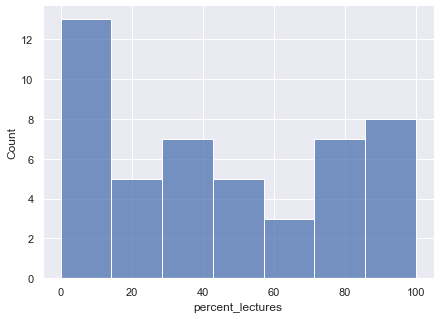

In [62]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data = df_final_1.percent_lectures)
sns.despine()
plt.show()

12 студентов - ни разу не посещали лекции. Остальные - посещали от 20% до 100%.

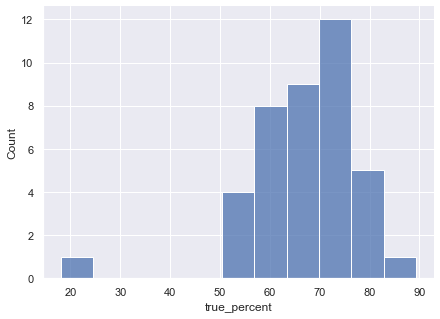

In [63]:
sns.histplot(data = df_final_1.true_percent)
sns.despine()
plt.show()

1 студент сдал на 20% (получил оценку 2), остальные в основном справились с выполнением задания (оценка 4), 5ку получил тоже только 1 студент.

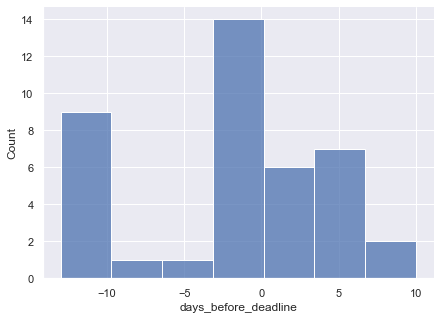

In [64]:
sns.histplot(data = df_final_1.days_before_deadline)
sns.despine()
plt.show()

Большая часть студентов сдали тест в срок, видим что прям перед самым дедлайном сдавали 14 человек, однако есть и те, кто сдал позже дедлайна.

In [65]:
rfm = df_final_1[['name','essay','percent_lectures', 'true_percent', 'days_before_deadline']]
rfm.true_percent = rfm.true_percent.fillna(0)
rfm.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,essay,percent_lectures,true_percent,days_before_deadline
count,18.0,48.000000,48.000000,40.000000
mean,1.0,44.750000,55.697708,-2.000000
std,0.0,37.794236,27.223426,6.621643
min,1.0,0.000000,0.000000,-13.000000
25%,1.0,0.000000,55.392500,-5.250000
50%,1.0,33.000000,64.715000,-1.000000
75%,1.0,83.000000,72.410000,3.000000
max,1.0,100.000000,89.270000,10.000000


In [66]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,essay,percent_lectures,true_percent,days_before_deadline
0.25,1.0,0.0,55.3925,-5.25
0.50,1.0,33.0,64.7150,-1.00
0.75,1.0,83.0,72.4100,3.00


Исходя из полученных данных для RFM анализа лучше применять не квантили, а задать границы интервалов определенными значениями

Обозначения для адаптированной RFM - сегментации:
    
**R** - считаем по колонке `days_before_deadline` разница во времени между днем сдачи и дедлайном

    1 - сдали быстрее всех
    2 - успели вовремя сдать
    3 - сдали после дедлайна
    
**F** - считаем по колонке `true_percent` - процент верных ответов в тесте
    
    1 – сдали тест лучше всех
    2 – сдали тест на проходной балл
    3 – не сдали тест (набрали ниже 60 %)
    
**M** - считаем по колонке `percent_lectures` - процент посещения лекций
    
    1 – посетили 70% и больше лекций
    2 – посетили как минимум 50% лекций
    3 – не сдали экзамен (оценка ниже 40 баллов)

In [67]:
# Зададим границы

def RClass(x):
    if x <= -5:
        return 1
    elif x <= 0:
        return 2
    else:
        return 3
    
def FClass(x):
    if x < 60:
        return 3
    elif x <= 80:
        return 2
    else:
        return 1
    
def MClass(x):
    if x < 50:
        return 3
    elif x <= 70:
        return 2
    else:
        return 1

In [68]:
rfmSegmentation = rfm.copy()

In [69]:
rfmSegmentation['R'] = rfmSegmentation['days_before_deadline'].apply(RClass)
rfmSegmentation['F'] = rfmSegmentation['true_percent'].apply(FClass)
rfmSegmentation['M'] = rfmSegmentation['percent_lectures'].apply(MClass)

rfmSegmentation['RFM_Score'] = rfmSegmentation['R'].map(str) + rfmSegmentation['F'].map(str) + rfmSegmentation['M'].map(str)
rfmSegmentation.head(10)

,name,essay,percent_lectures,true_percent,days_before_deadline,R,F,M,RFM_Score
0,Гресь Артём,1.0,100.0,63.91,-13.0,1,2,1,121
1,Сыров Михаил,1.0,100.0,74.44,-13.0,1,2,1,121
2,Городнева Анастасия,1.0,100.0,60.15,-2.0,2,2,1,221
3,Ковалев Александр,1.0,100.0,67.05,-11.0,1,2,1,121
4,Крючков Егор,1.0,100.0,78.95,-13.0,1,2,1,121
5,Шептицкий Роман,1.0,100.0,77.78,3.0,3,2,1,321
6,Рыженков Егор,1.0,100.0,77.78,-1.0,2,2,1,221
7,Алимова Ксения,NaN,100.0,70.88,2.0,3,2,1,321
8,Дружинин Дмитрий,NaN,83.0,75.94,5.0,3,2,1,321
9,Ростошинский Марк,NaN,83.0,59.39,2.0,3,3,1,331


In [70]:
segt_map = {
    r'[1-2][1-2][1-2]': 'Сдали зачет автоматом',
    r'[1-2][1-2]3': 'Нужно досдать конспекты лекций',
    r'33[1-3]': 'Требуется пересдача: переписать тест и сделать дополнительное задание',
    r'[1-2]33': 'Требуется пересдача: переписать тест, принести конспект',
    r'3[1-2]3': 'Требуется пересдача: принести конспект и сделать дополнительное задание',
    r'[1-2]3[1-2]': 'Требуется переписать тест',
    r'3[1-2][1-2]': 'Сдали после дедлайна, можно сделать дополнительное задание',
          
}

rfmSegmentation['Segment'] = rfmSegmentation['RFM_Score'].replace(segt_map, regex=True)
rmf_group = rfmSegmentation.Segment.value_counts().to_frame(name = 'count_students')
rmf_group

,count_students
Сдали зачет автоматом,13
Требуется пересдача: переписать тест и сделать дополнительное задание,11
Нужно досдать конспекты лекций,7
Требуется пересдача: принести конспект и сделать дополнительное задание,7
"Сдали после дедлайна, можно сделать дополнительное задание",5
Требуется переписать тест,3
"Требуется пересдача: переписать тест, принести конспект",2


In [71]:
rfmSegmentation.head()

,name,essay,percent_lectures,true_percent,days_before_deadline,R,F,M,RFM_Score,Segment
0,Гресь Артём,1.0,100.0,63.91,-13.0,1,2,1,121,Сдали зачет автоматом
1,Сыров Михаил,1.0,100.0,74.44,-13.0,1,2,1,121,Сдали зачет автоматом
2,Городнева Анастасия,1.0,100.0,60.15,-2.0,2,2,1,221,Сдали зачет автоматом
3,Ковалев Александр,1.0,100.0,67.05,-11.0,1,2,1,121,Сдали зачет автоматом
4,Крючков Егор,1.0,100.0,78.95,-13.0,1,2,1,121,Сдали зачет автоматом


### Задача 2. Составление рейтинга студентов.
Необходимо выбрать не более 5 самых лучших студентов, для передачи информации о них в деканат. В деканате собираются данные по разным предметам об успешных студентах и составляются списки для подачи документов на дополнительную стипендию.

In [73]:
rfmSegmentation.query('RFM_Score == "121" and essay == 1')

,name,essay,percent_lectures,true_percent,days_before_deadline,R,F,M,RFM_Score,Segment
0,Гресь Артём,1.0,100.0,63.91,-13.0,1,2,1,121,Сдали зачет автоматом
1,Сыров Михаил,1.0,100.0,74.44,-13.0,1,2,1,121,Сдали зачет автоматом
3,Ковалев Александр,1.0,100.0,67.05,-11.0,1,2,1,121,Сдали зачет автоматом
4,Крючков Егор,1.0,100.0,78.95,-13.0,1,2,1,121,Сдали зачет автоматом
13,Тимофеева Анастасия,1.0,83.0,72.41,-9.0,1,2,1,121,Сдали зачет автоматом


Студентов с RFM_Score = 111 - нет, то есть нет студентов с баллами за тест более 80%, поэтому отфильтрованы лучшие студенты с RFM_Score = 121 - то есть студенты, у которых балл за тест от 60 до 80%. Вместе с тем, эти студенты посещали почти или все лекции и сдали тест во время до дедлайна, а также сдали доклад.

### Задача 3. Анализ сложности теста по предмету Экология.

Выявление самых сложных вопросов (топ 5) в рамках теста по ***Экологии*** осуществляется в целях проработки сложных тем на практических занятиях. Для этого необходимо сравнить среднее и медианное время в секундах `time_sec`, которое студенты потратили на решение вопросов.

In [74]:
ecology_test_sec_long = pd.melt(ecology_test_sec, id_vars='name', var_name='question_number', value_name='time_sec')
ecology_test_sec_long.head()

,name,question_number,time_sec
0,Пахомов Евгений Валентинович,sec_1,80.0
1,Уварова Дарья Романовна,sec_1,26.0
2,Щекотов Всеволод Александрович,sec_1,28.0
3,Веремейчик Павел Сергеевич,sec_1,88.0
4,Лекремьоара,sec_1,2.0


In [75]:
ecology_test_sec_mean = ecology_test_sec_long.groupby('question_number',as_index=False)\
                                                    .agg({'time_sec':'mean'})\
                                                    .sort_values('time_sec', ascending=False)
ecology_test_sec_mean.head(5)

,question_number,time_sec
45,sec_50,167.121951
14,sec_22,152.243902
20,sec_28,139.585366
52,sec_57,121.682927
38,sec_44,115.634146


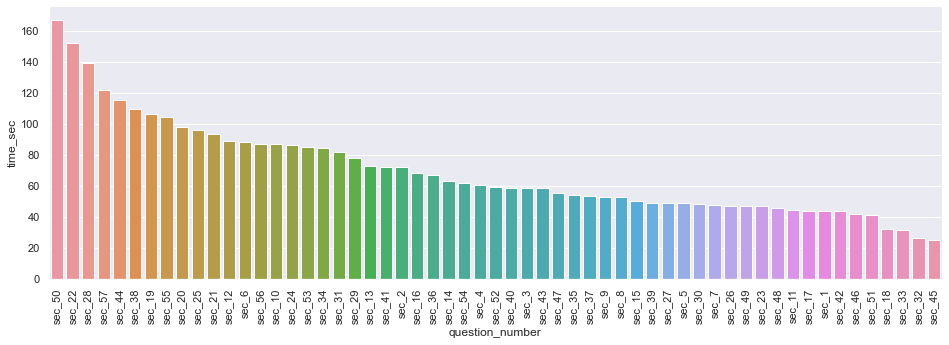

In [76]:
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = ecology_test_sec_mean, x='question_number', y='time_sec')
plt.xticks(rotation=90)
sns.despine()
plt.show()

In [77]:
ecology_test_sec_median = ecology_test_sec_long.groupby('question_number',as_index=False)\
                                                    .agg({'time_sec':'median'})\
                                                    .sort_values('time_sec', ascending=False)
ecology_test_sec_median.head(5)

,question_number,time_sec
45,sec_50,170.0
38,sec_44,113.0
50,sec_55,113.0
14,sec_22,111.0
52,sec_57,100.0


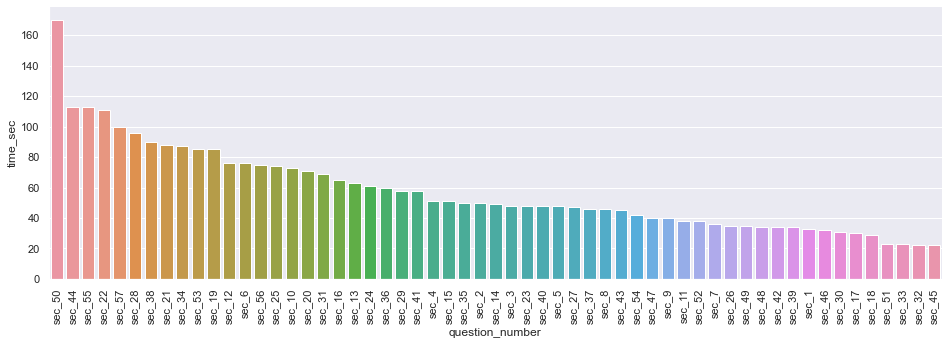

In [78]:
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = ecology_test_sec_median, x='question_number', y='time_sec')
plt.xticks(rotation=90)
sns.despine()
plt.show()

Самые сложные вопросы, номера которых -  ***50, 22, 28, 57, 44***, если считать по среднему времени выполнения, если рассматривать медианное время, то ***50, 44, 55, 22, 57***. Вопросы написаны в конструкторе онлайн тестов, список которых доступен преподавателю. Можно сделать вывод, что самое долгое время прохождение задания может быть связано не только со сложностью темы, но и сложностью формулировки самого задания. Эти вопросы могут быть разобраны на практических занятиях.